<a href="https://colab.research.google.com/github/hydr1o/emotionrecognition/blob/main/emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Let's import qki libraries and preprocess data**
##### We're gonna preprocess data with pandas and numpy and transform it to 3d array with **48x48x1** resolution, initial data looks like this: **70 80 82 72 58 58 60 63 54 58 60 48 89 115 121... 245**. It's string with 2304 numbers with pixel value. Each pixel value is going to be number between 0 and 1, so each pixel value we are gonna to divide by 255.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 
#Importing models and layers for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
#Importing Stohastic Gradient descent optimizer
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow

#reading csv file
df = pd.read_csv('./drive/My Drive/fer2013.csv')
images = df['pixels']
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
#let's check tensorflow version
print(tensorflow.__version__)

2.3.0


In [ ]:
df['len'] = pd.Series(np.array([len(image.split(' ')) for image in df['pixels'] ]))
df.head(10)

,emotion,pixels,Usage,len
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,2304
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,2304
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,2304
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,2304
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,2304
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training,2304
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training,2304
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training,2304
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training,2304
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training,2304


##### **Let's make function that will read and preprocess data from our dataset**

In [ ]:
def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [ ]:
X, y = getData('./drive/My Drive/fer2013.csv')

In [ ]:
y.shape

(35887,)

In [ ]:
N, D = X.shape
X = X.reshape(N, 48, 48)

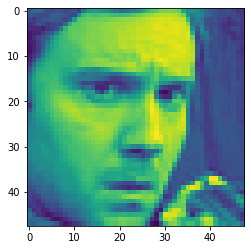

In [ ]:
plt.imshow(X[0])
plt.show()

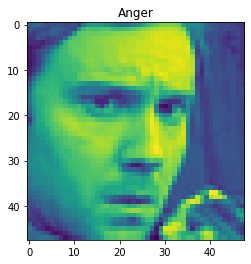

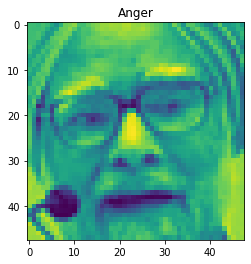

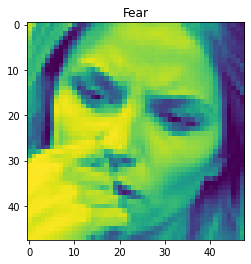

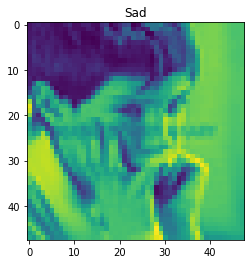

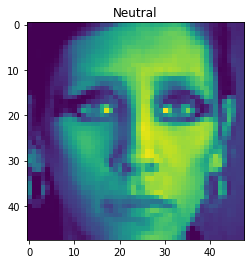

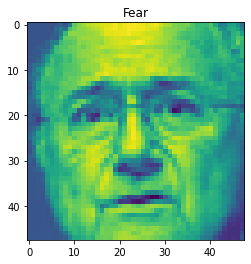

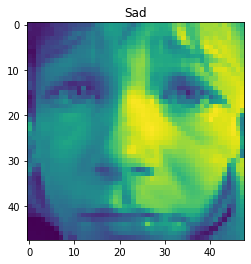

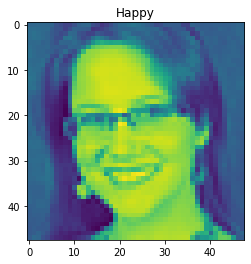

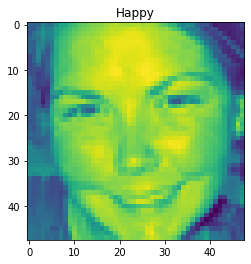

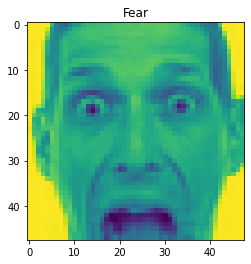

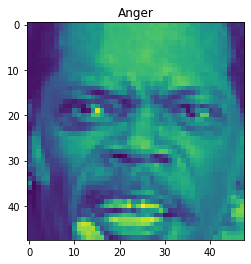

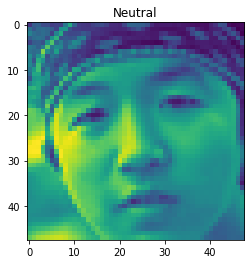

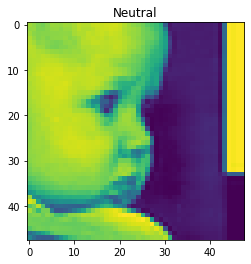

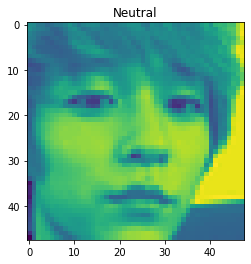

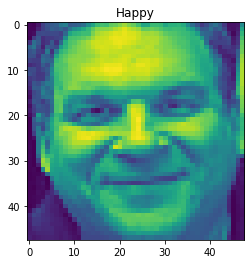

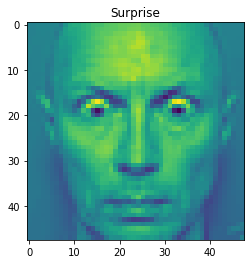

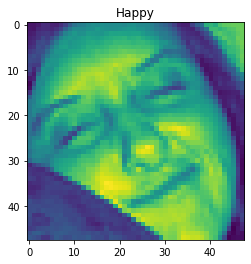

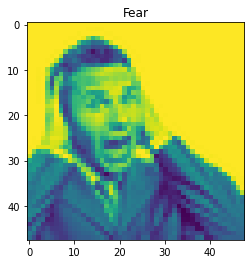

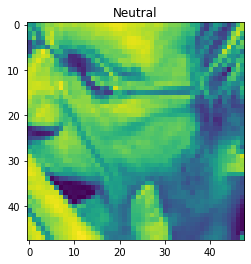

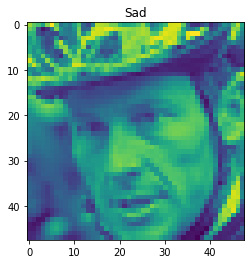

In [ ]:
#showing first 20 images
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
for i in range(20):
  plt.imshow(X[i])
  plt.title(label_map[y[i]])
  plt.show()

In [ ]:
#Importing models and layers for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout

#creating architecture of our neural net
model = keras.models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(48,48,1), activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))

model.add(layers.MaxPool2D((2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(layers.Dropout(0.2))


model.add(layers.Dense(7,activation='softmax'))


model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
dropout_43 (Dropout)         (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 42, 42, 32)        51232     
_________________________________________________________________
dropout_44 (Dropout)         (None, 42, 42, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 21, 21, 32)        128       
_________________________________________________________________
flatten_14 (Flatten)         (None, 14112)           

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
print(type(y_train),type(y_test))
#trasnfrorming train labels to categorical - Example: 2 - [0,0,1,0,0,0]
#                                                     3 - [0,0,0,1,0,0]
#                                                     6 - [0,0,0,0,0,1] 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_test.shape)
#reshaping test data for neural net
X_test = X_test.reshape((7178,48,48,1))

#compiling model(neural net)
model.compile(loss = 'mse',
              optimizer = 'adam',
              metrics=['accuracy'])


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(7178, 7)


In [ ]:
print(X_test.shape,y_train.shape,y_test.shape,X_train.shape)

(7178, 48, 48, 1) (28709, 7) (7178, 7) (28709, 48, 48)


In [ ]:
#reshaping train data for neural net
X_train = X_train.reshape((28709,48,48,1))

In [ ]:
#training our model
model.fit(X_train,y_train,
          batch_size=64,
          epochs=25)

Epoch 1/25
449/449 [==============================] - 7s 16ms/step - loss: 0.1547 - accuracy: 0.2700
Epoch 2/25
449/449 [==============================] - 7s 16ms/step - loss: 0.1146 - accuracy: 0.3353
Epoch 3/25
449/449 [==============================] - 7s 16ms/step - loss: 0.1099 - accuracy: 0.3767
Epoch 4/25
449/449 [==============================] - 7s 16ms/step - loss: 0.1065 - accuracy: 0.4025
Epoch 5/25
449/449 [==============================] - 7s 16ms/step - loss: 0.1044 - accuracy: 0.4174
Epoch 6/25
449/449 [==============================] - 7s 16ms/step - loss: 0.1028 - accuracy: 0.4314
Epoch 7/25
449/449 [==============================] - 7s 16ms/step - loss: 0.1017 - accuracy: 0.4412
Epoch 8/25
449/449 [==============================] - 7s 16ms/step - loss: 0.1007 - accuracy: 0.4510
Epoch 9/25
449/449 [==============================] - 7s 16ms/step - loss: 0.0996 - accuracy: 0.4560
Epoch 10/25
449/449 [==============================] - 7s 16ms/step - loss: 0.0987 - accura

# ***Let's check model accuracy and loss on our testing data***



In [ ]:
#check model accuracy and loss on testing data
model.evaluate(X_test, y_test)

225/225 [==============================] - 1s 4ms/step - loss: 0.0989 - accuracy: 0.4643


[0.09891823679208755, 0.46433547139167786]

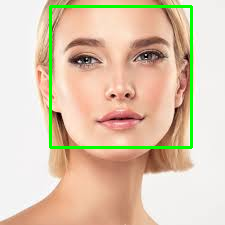

Surprise


In [ ]:
#importing qki biblioteki
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def classify_image(image_path):
  #reading image
  image = cv2.imread(image_path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #detecting faces on image
  faces = faceCascade.detectMultiScale(
      gray,
      scaleFactor=1.1,
      minNeighbors=1,
      minSize=(100, 100),
      flags = cv2.CASCADE_SCALE_IMAGE
  )
  for (x, Y, w, h) in faces:
      cv2.rectangle(image, (x ,Y), (x+w, Y+h), (0, 255, 0), 2)
  cv2_imshow(image)
  image = image[Y:Y+h,x:x+w]
  #resizing image
  image = cv2.resize(image, (48,48), interpolation = cv2.INTER_AREA)
  image = image[:,:,0]
  image = image.reshape((1, 48, 48, 1))
  #predicting emotion
  print(label_map[np.argmax(model.predict(image))])
#run function
classify_image('./drive/My Drive/face.jpg')
